### **ADP 27회 실기 문제**
* 데이터 url :https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv
* 출처 :https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud (후처리)

#### **문제 1-1**  : EDA 데이터 탐색 (시각화 포함)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [38]:
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/rauds.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23.0,1.173285,0.353498,0.283905,1.133563,-0.172577,-0.916054,0.369025,-0.327260,-0.246651,...,0.067003,0.227812,-0.150487,0.435045,0.724825,-0.337082,0.016368,0.030041,41.88,0
1,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
2,36.0,1.095525,-0.116085,1.397912,1.497547,-1.049124,0.072839,-0.723802,0.287532,0.996327,...,-0.033234,0.093262,0.089498,0.361261,0.250963,-0.378280,0.081024,0.034227,2.09,0
3,39.0,-1.330882,0.267540,-0.168470,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,...,-0.151042,-0.311726,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0
4,42.0,-0.249361,0.399227,0.068009,-1.060619,2.410399,3.736574,0.316446,0.672296,0.015140,...,-0.257663,-0.616762,-0.156669,1.031135,0.120617,0.310494,-0.288299,-0.223964,32.51,0


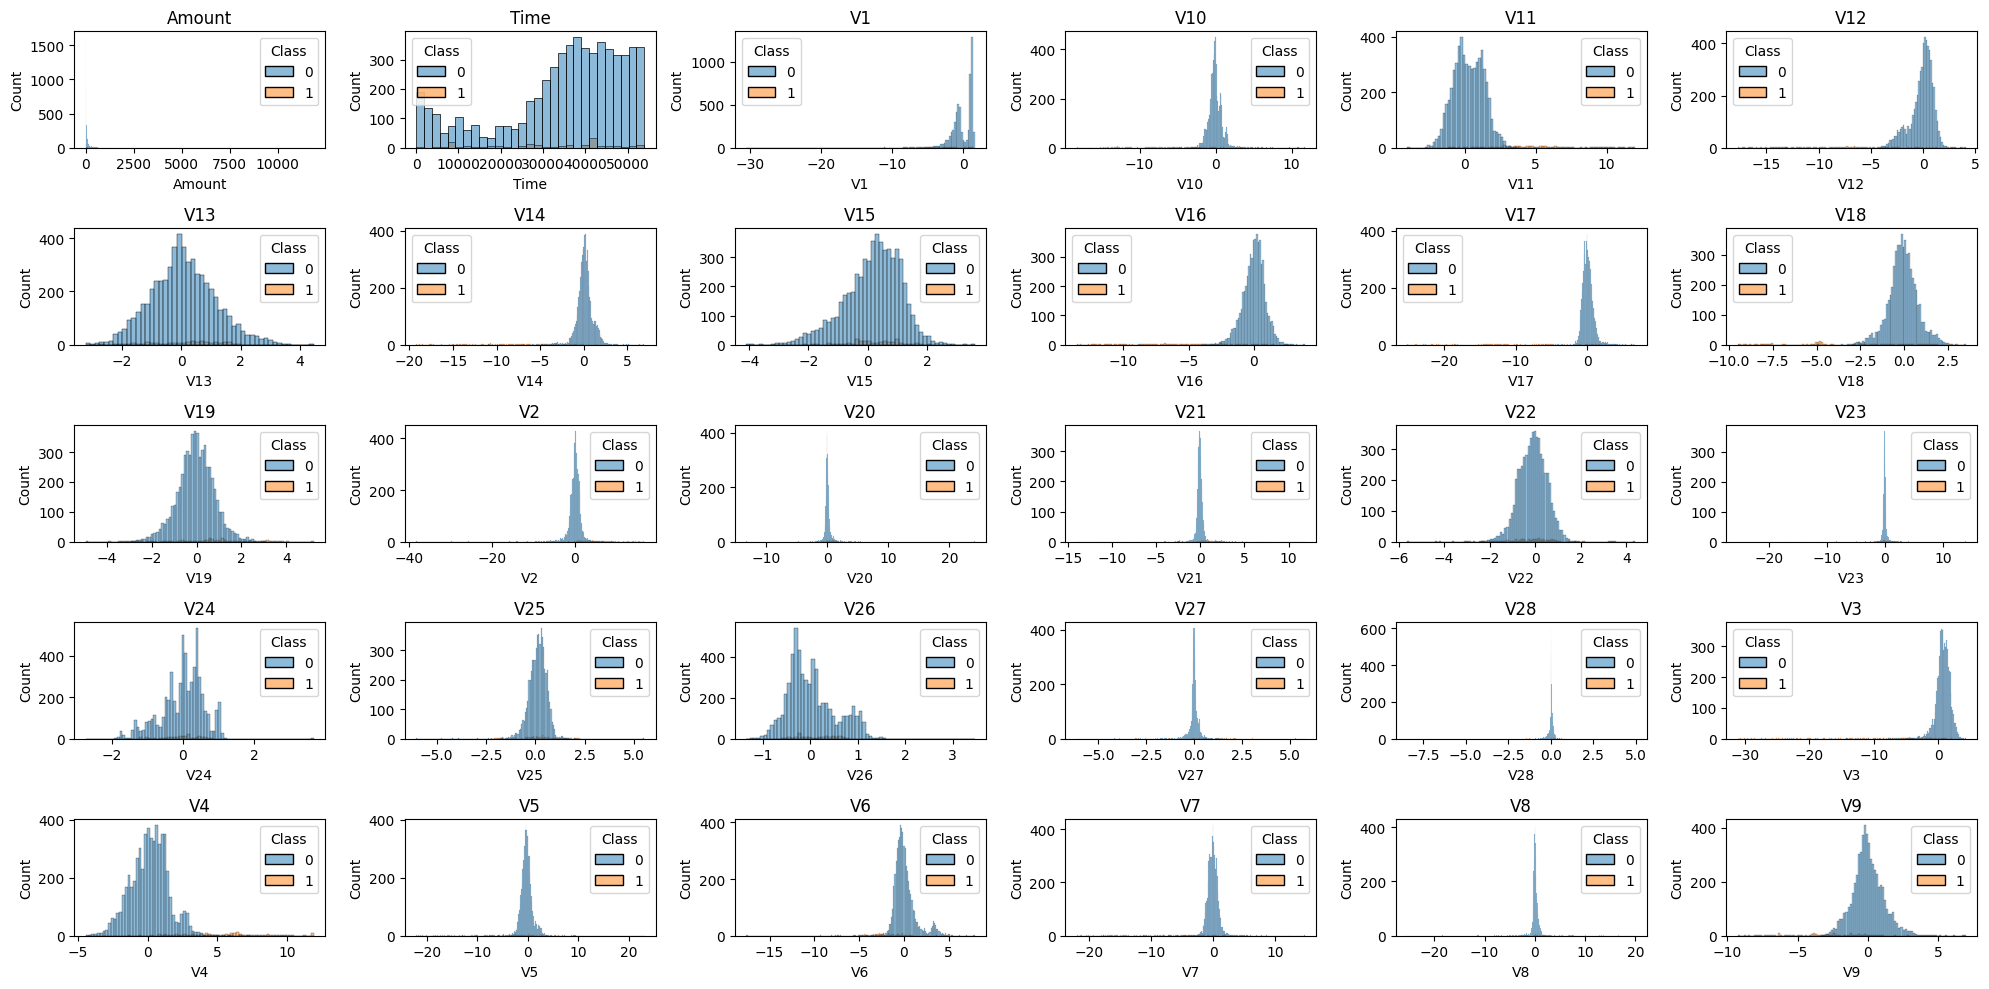

    Column        P_value
0   Amount   9.324973e-01
1     Time   6.340743e-05
2       V1  5.749575e-303
3      V10   0.000000e+00
4      V11   0.000000e+00
5      V12   0.000000e+00
6      V13   1.466749e-01
7      V14   0.000000e+00
8      V15   6.717801e-01
9      V16   0.000000e+00
10     V17   0.000000e+00
11     V18   0.000000e+00
12     V19   3.318482e-39
13      V2  5.624011e-266
14     V20   2.247407e-10
15     V21   3.501486e-55
16     V22   1.207698e-01
17     V23   4.213511e-04
18     V24   8.559758e-02
19     V25   1.319479e-03
20     V26   5.216961e-02
21     V27   3.618457e-76
22     V28   8.302998e-02
23      V3   0.000000e+00
24      V4   0.000000e+00
25      V5  3.917445e-283
26      V6  2.590397e-105
27      V7   0.000000e+00
28      V8  1.224824e-191
29      V9  1.760178e-249


In [39]:
# Class별 분포 및 통계 

fig, axes = plt.subplots(5,6, figsize = (20,10))

res = []
for axes, col in zip(axes.flatten(), df.columns.difference(['Class'])) : 

    target = df[[col, 'Class']]
    g1 = target[target['Class'] == 0][col]
    g2 = target[target['Class'] == 1][col]

    stat, p_val = ttest_ind(g1, g2)
    res.append({
        'Column' : col, 
        'P_value' : p_val
    })

    sns.histplot(data = target, x = col, hue = target['Class'], ax = axes)
    axes.set_title(col)

plt.tight_layout()
plt.show()

print(pd.DataFrame(res))

#### **문제 1-2**  : 변수간 상관관계를 시각화하고 전처리가 필요하다면 그 이유를 설명하고 시행

<Axes: >

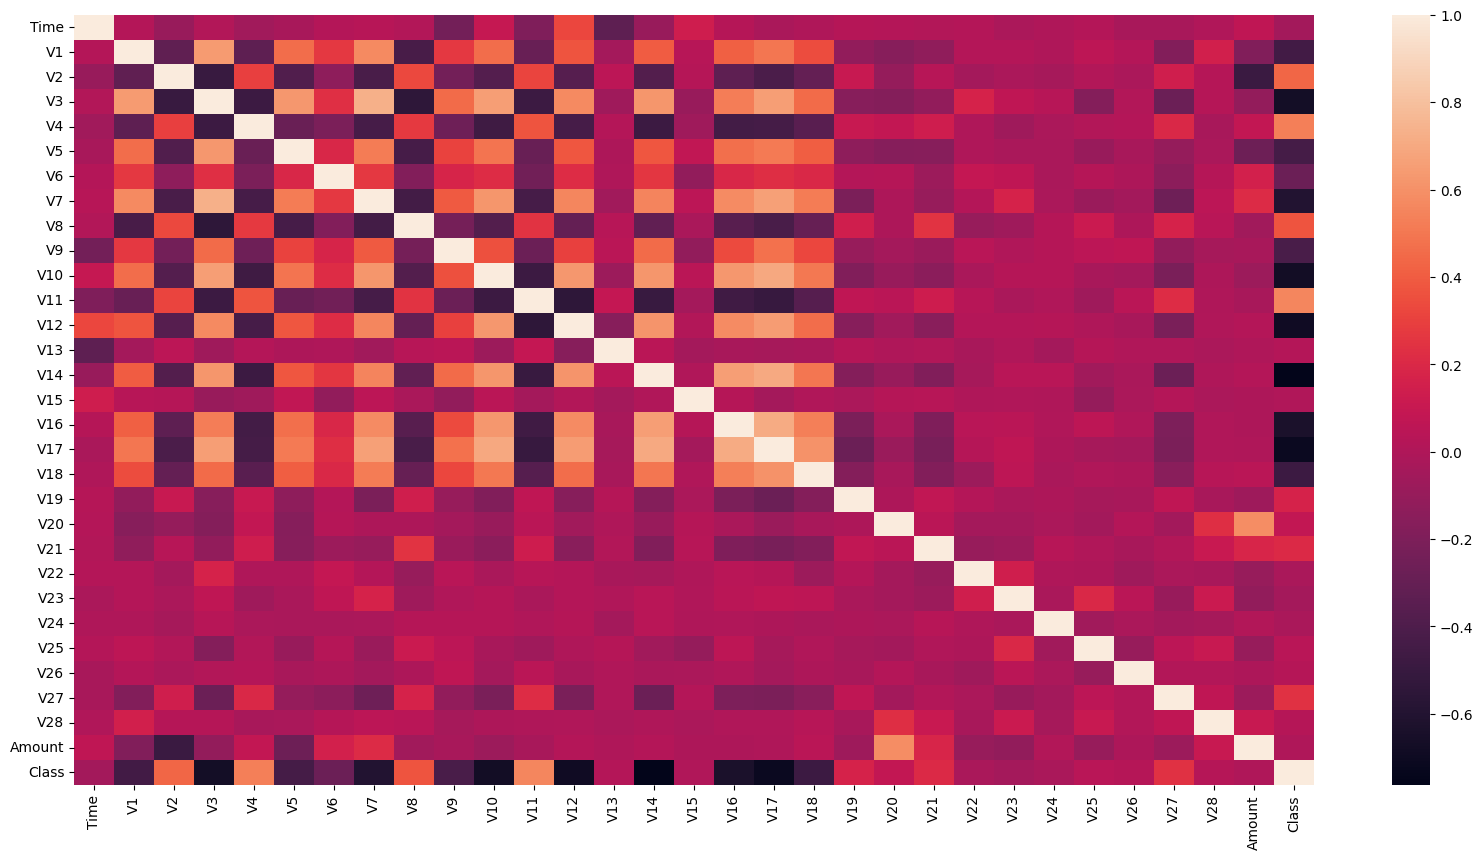

In [40]:
corr = df.corr()
cor_df = corr.unstack().reset_index()
cor_df.columns = ['col1','col2', 'cor']

fig,ax = plt.subplots(1,figsize=(20,10))
sns.heatmap(corr, ax= ax)

In [41]:
# 다중공선성 확인하기 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()

X = df.drop(columns = 'Class', axis = 1)
vif['var'] = X.columns
vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

       var        vif
0     Time   4.092835
1       V1   4.683587
2       V2  10.867257
3       V3   7.165836
4       V4   2.009740
5       V5   7.239529
6       V6   2.227953
7       V7  12.227716
8       V8   2.123046
9       V9   1.581428
10     V10   3.259506
11     V11   1.857072
12     V12   2.604271
13     V13   1.127994
14     V14   3.156547
15     V15   1.305950
16     V16   2.779684
17     V17   3.883965
18     V18   1.793852
19     V19   1.178251
20     V20   2.853343
21     V21   1.341575
22     V22   1.429031
23     V23   2.206408
24     V24   1.027321
25     V25   1.526949
26     V26   1.084286
27     V27   1.185869
28     V28   1.413516
29  Amount  24.614561


#### **문제 2.1** 차원 축소 방법 논의

In [42]:
print('''
pca
장점 :
주성분은 데이터의 변동성을 최대화하는 방향으로 정의되어 데이터의 중요한 특징을 잘 찾아낸다.
선형 변환을 통해 계산하므로 효율적이고 주성분의 중요도를 파악하는데 용이하다.
단점 :
작은 분산을 가지는 성분 무시 될 가능성 높음
비선형 특성을 파악하기 어렵다
t-sne

장점
비선형 구조나 군집을 잘 표현할 수 있다.
이웃 데이터 간 거리를 고려하므로 군집 시각화가 용이하다.
단점
변수간 관계 해석 어렵다
계산이 오래걸린다.

''')


pca
장점 :
주성분은 데이터의 변동성을 최대화하는 방향으로 정의되어 데이터의 중요한 특징을 잘 찾아낸다.
선형 변환을 통해 계산하므로 효율적이고 주성분의 중요도를 파악하는데 용이하다.
단점 :
작은 분산을 가지는 성분 무시 될 가능성 높음
비선형 특성을 파악하기 어렵다
t-sne

장점
비선형 구조나 군집을 잘 표현할 수 있다.
이웃 데이터 간 거리를 고려하므로 군집 시각화가 용이하다.
단점
변수간 관계 해석 어렵다
계산이 오래걸린다.




In [43]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

drop_X = X.drop(columns = ['V2','V7'], axis = 1)

ss = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(drop_X),columns = drop_X.columns)


pca = PCA()
pca.fit(scaled_x)

pca_df = pd.DataFrame({
    'ratio' : pca.explained_variance_ratio_,
    'cumsum' : pca.explained_variance_ratio_.cumsum()
})

pca_df.T

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
ratio,0.247511,0.067409,0.057492,0.049758,0.044995,0.042554,0.039852,0.037920,0.037308,0.036041,...,0.019115,0.018141,0.017371,0.014534,0.012590,0.011188,0.010059,0.009046,0.007356,0.00416
cumsum,0.247511,0.314920,0.372412,0.422170,0.467165,0.509719,0.549571,0.587491,0.624799,0.660840,...,0.895556,0.913697,0.931067,0.945602,0.958191,0.969380,0.979439,0.988484,0.995840,1.00000


<Axes: xlabel='PC_1', ylabel='PC_2'>

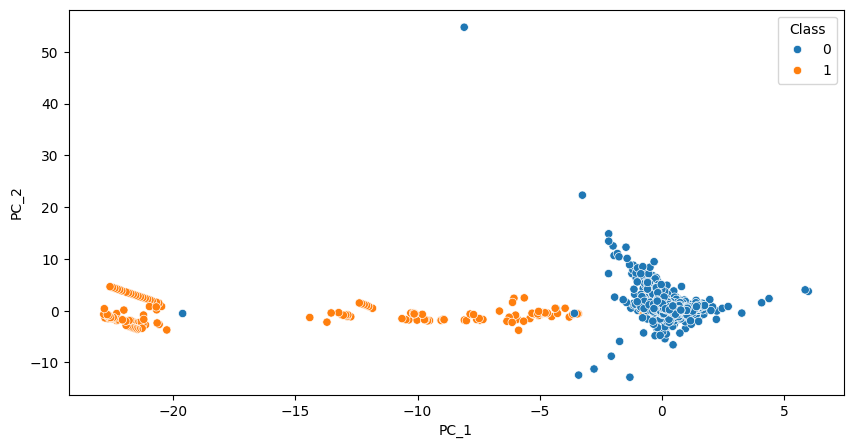

In [44]:
pca18 = PCA(n_components = 18)
pca18_df = pd.DataFrame(pca18.fit_transform(scaled_x))

pca18_df.columns  = ['PC_' + str(x) for x in range(1, 19)]

fig, ax = plt.subplots(1, figsize = (10, 5))
sns.scatterplot(x = pca18_df['PC_1'] , y = pca18_df['PC_2'], hue = df.Class)

#### **문제 3.1** 오버샘플링 VS 언더샘플링
오버샘플링 및 언더샘플링 방식 중 하나를 선택하여 구현,Class를 종속변수로 하는 분류 모델을 2가지 이상 구현하고 성능을 비교

Class
0    5723
1     177
Name: count, dtype: int64


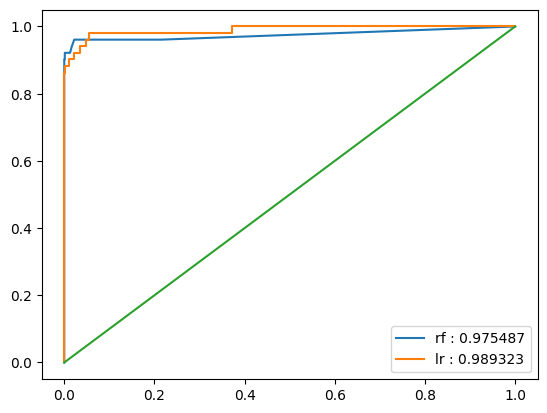

In [45]:
model_df = pd.concat([scaled_x, df['Class']], axis = 1)

# Class의 카운트
print(model_df.Class.value_counts())
# 오버 샘플링 선정 - 소수의 레이블을 데이터 추가로 샘플링 (SMOTE)


# 기존의 X, y
X = model_df.drop(columns = 'Class', axis = 1)
y = model_df['Class']

def eval_model(name, model) : 
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    # roc_curve 
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    auc = roc_auc_score(y_test, pred_proba)
    plt.plot(fpr, tpr, label = f'{name} : {auc:2f}')
    
    f1 = f1_score(y_test, pred) 

    return name, f1 

res = []
for name, model in [['rf', RandomForestClassifier(random_state=1)], ['lr' , LogisticRegression()]] : 
    name, f1 = eval_model(name, model)
    res.append({
        'Model Name' : name, 
        'F1_score' : f1 
    })
    

plt.plot([0,1], [0,1])
plt.legend()
plt.show()

Class
0    5723
1     177
Name: count, dtype: int64
Class
0    5723
1    5723
Name: count, dtype: int64


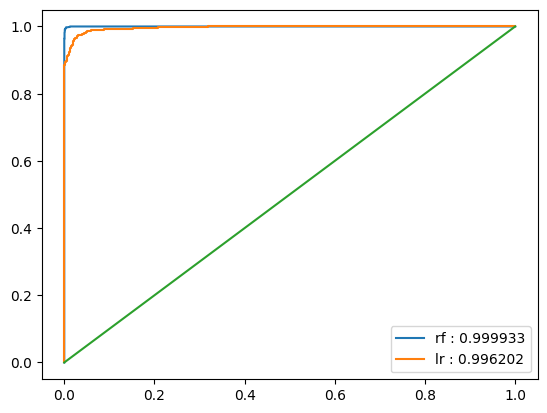

In [46]:
model_df = pd.concat([scaled_x, df['Class']], axis = 1)

# Class의 카운트
print(model_df.Class.value_counts())
# 오버 샘플링 선정 - 소수의 레이블을 데이터 추가로 샘플링 (SMOTE)


# 기존의 X, y
X = model_df.drop(columns = 'Class', axis = 1)
y = model_df['Class']

sm = SMOTE()
sm_x , sm_y = sm.fit_resample(X,y)
print(sm_y.value_counts())

def eval_model(name, model) : 
    x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, test_size = 0.3, random_state = 42)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    # roc_curve 
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    auc = roc_auc_score(y_test, pred_proba)
    plt.plot(fpr, tpr, label = f'{name} : {auc:2f}')
    
    f1 = f1_score(y_test, pred) 

    return name, f1 

res = []
for name, model in [['rf', RandomForestClassifier(random_state=1)], ['lr' , LogisticRegression()]] : 
    name, f1 = eval_model(name, model)
    res.append({
        'Model Name' : name, 
        'F1_score' : f1 
    })
    

plt.plot([0,1], [0,1])
plt.legend()
plt.show()

#### **문제 4.1**
Class 컬럼이 주어지지 않았다고 가정하고 비지도 학습 방식의 이상탐지 모델을 만들려고한다.
이상 탐지 모델 2가지 이상 기술하고 장단점을 설명

In [47]:
print('''
1. Isolation Forest 
    : 이상치는 소수 특징을 가지고, 작은 분할으로 고립시켜, 분리되는 깊이의 평균값을 기반으로 이상치 점수를 산출
    장점 : 고차원 데이터에서도 잘 작동/ 속도가 빠르고, 대용량 데이터에 적합/ 분포가정이 필요하지 않음
    단점 : 이상치가 소수 존재한다는 전제에 기반, 파라미터에 따라 성능이 민감함 

2. One Class SVM
    : 정상 데이터를 초평면, 결정 경계를 학습시키고, 경계 밖에 위치하는 점을 이상치로 판별 
    장점 : 비선형 구조 데이터에도 적용이 가능/ 이상치가 적을때 강력한 성능
    단점 : 데이터 크키가 크면, 학습속도가 느림, 
''')


1. Isolation Forest 
    : 이상치는 소수 특징을 가지고, 작은 분할으로 고립시켜, 분리되는 깊이의 평균값을 기반으로 이상치 점수를 산출
    장점 : 고차원 데이터에서도 잘 작동/ 속도가 빠르고, 대용량 데이터에 적합/ 분포가정이 필요하지 않음
    단점 : 이상치가 소수 존재한다는 전제에 기반, 파라미터에 따라 성능이 민감함 

2. One Class SVM
    : 정상 데이터를 초평면, 결정 경계를 학습시키고, 경계 밖에 위치하는 점을 이상치로 판별 
    장점 : 비선형 구조 데이터에도 적용이 가능/ 이상치가 적을때 강력한 성능
    단점 : 데이터 크키가 크면, 학습속도가 느림, 



In [48]:
from sklearn.ensemble import IsolationForest


x_train, x_test, y_train, y_test = train_test_split(sm_x, sm_y, test_size = 0.3, random_state = 42)

isf = IsolationForest(random_state = 42)
isf.fit(x_train)
pred  = pd.Series(isf.predict(x_test)).map({1:0, -1 :1}) # 1.정상. -1 비정상

isf_score = f1_score(y_test, pred)
print(isf_score)

0.45634563456345634


#### **문제 5**
2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개, 그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때, 연평균 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [49]:
y2 = 100000
y1 = 150000
y0 = 250000

# 산술평가 증가율 
g1 = (y1 - y2) / y2 
g2 = (y0 - y1) / y1 

mean = (g1 + g2) / 2
mean * 100 

58.33333333333333

#### **문제 6**
12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [55]:
from scipy import stats 
n = 12 
x = 15.5
var = 3.2 

sd = np.sqrt(var)
confa = 0.1

df = n- 1
# SE 
se = sd / np.sqrt(n)

# t -score
conft = stats.t.ppf(1 - confa /2 , df)

# ME 
ME = se * conft 

# 구간
print(x - ME, x + ME)

confidence_interval = stats.t.interval(
    confidence=0.9,
    df=df,
    loc=x,
    scale= se
)

print(confidence_interval)

14.572609067393861 16.427390932606137
(np.float64(14.572609067393861), np.float64(16.427390932606137))


#### **문제 7**
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정 </br>
(단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

In [56]:
from scipy.stats import ttest_rel
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


In [58]:
# 분석방법 
# 같은 강 (A)에 상류, 하류를 측정 대응 T 검정
# 독립이라면? = 상류와 하류의 표본이 서로 다른 강에서 독립적으로 뽑혔다는 것, 독립된 집단에서 데이터가 생성됨
s,p = ttest_rel(df['up'],df['down'])
print('''
귀무가설 : 강의 상류와 하류의 생물 다양성 점수에는 차이가 없다.
대립가설 : 강의 상류와 하류의 생물 다양성 점수에는 차이가 있다.
''')


if p < 0.05 : 
    print('귀무가설 기각 - 차이가없다')
else : 
    print('차이가있다')


귀무가설 : 강의 상류와 하류의 생물 다양성 점수에는 차이가 없다.
대립가설 : 강의 상류와 하류의 생물 다양성 점수에는 차이가 있다.

차이가있다


#### **문제 8**
분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오. </br>
(반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [59]:
# from statsmodels.api import QuantReg
import numpy as np
import statsmodels.api  as sm
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')


quantile = 0.5
X = sm.add_constant(df.drop(columns =['user_counts']))  # 상수항 추가
model = sm.QuantReg(df['user_counts'], X)
result = model.fit(q=quantile)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Fri, 29 Aug 2025   No. Observations:                 2097
Time:                        14:50:01   Df Residuals:                     2093
                                        Df Model:                            3
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7.891    -10.567      0.000     -98.859     -67.910
=================================================================================
"""

In [64]:
# temperature : 10.5 , wind : 8.2 , precipitation : 3.5 일때 user_counts를 예측하시오

# 회귀계수 추출
coef = result.params.values
pred = np.array([1, 10.5, 8.2, 3.5]) # 1 상수항 가가

sum(coef * pred)

np.float64(7412.239537269643)

#### **문제 9**
지하철 호선과 월별, 승객 수 간 상관관계가 있는지 확인(Type III Anova 사용)

In [68]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/subway.csv')
df.head()

,line,month,total
0,1,1,1703
1,1,2,1548
2,1,3,1615
3,1,4,1739
4,1,5,1735


In [71]:
from scipy.stats import shapiro, levene

# 1. 정규성 검토 line * month 별은 조합이 부족해서 Nan이 나옴
stat, p_val = shapiro(df['total'].dropna())
print("전체 데이터 정규성:", "기각" if p_val < 0.05 else "채택")

전체 데이터 정규성: 채택


In [78]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Type 3 : 이미 추가된 변수, 상호작용 및 변수의 존재여부를 모두 고려 (집단별 표본수가 동일하지 않을때)
model =  ols('total ~ line + month + line*month', data=df).fit()
anova_res = sm.stats.anova_lm(model, typ=3)
print(anova_res)

                  sum_sq    df           F        PR(>F)
Intercept   4.993217e+06   1.0  497.746547  1.281602e-25
line        3.173160e+03   1.0    0.316315  5.766850e-01
month       2.118582e+04   1.0    2.111898  1.532533e-01
line:month  2.115084e+03   1.0    0.210841  6.483694e-01
Residual    4.413924e+05  44.0         NaN           NaN


In [80]:
print('''
주효과
1. Line 
    귀무 : 호선에 따른 승객수 차이가 없다.
    대립 : 호선에 따른 승객수 차이가 있다.
2. month 
    귀무 : 월에 따른 승객수 차이가 없다.
    대립 : 월에 따른 승객수 차이가 있다.

교호작용 : 즉, 월별 승객수 변화가 호선마다 다르게 나타나는지에 대한 유무
    귀무 : 호선과 월 사이에는 상호작용 효과가 없다
    대립 : 호선과 월 사이에는 상호작용 효과가 있다.

''')


주효과
1. Line 
    귀무 : 호선에 따른 승객수 차이가 없다.
    대립 : 호선에 따른 승객수 차이가 있다.
2. month 
    귀무 : 월에 따른 승객수 차이가 없다.
    대립 : 월에 따른 승객수 차이가 있다.

교호작용 : 즉, 월별 승객수 변화가 호선마다 다르게 나타나는지에 대한 유무
    귀무 : 호선과 월 사이에는 상호작용 효과가 없다
    대립 : 호선과 월 사이에는 상호작용 효과가 있다.




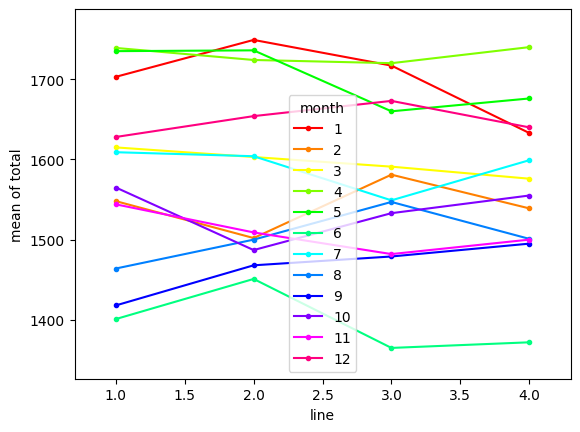

In [83]:
# 교호작용 확인
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df['line'], df['month'] , df['total'])
plt.show()

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2      1.5    1.0  -115.581  118.581  False
     1      3     -6.0 0.9991  -123.081  111.081  False
     1      4 -11.9167 0.9929 -128.9977 105.1644  False
     2      3     -7.5 0.9982  -124.581  109.581  False
     2      4 -13.4167 0.9899 -130.4977 103.6644  False
     3      4  -5.9167 0.9991 -122.9977 111.1644  False
-------------------------------------------------------
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     1      2   -158.0    0.0 -236.7315  -79.2685   True
     1      3  -104.25 0.0024 -182.9815  -25.5185   True
     1      4    30.25 0.9673  -48.4815  108.9815  False
     1      5     1.25    1.0  -77.4815   79.9815  False
     1      6  -303.25    0.0 -381.9815 -

C:\Users\i2max-DoeunKim\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\i2max-DoeunKim\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
   1_1   1_10   -138.0   nan   nan   nan  False
   1_1   1_11   -159.0   nan   nan   nan  False
   1_1   1_12    -75.0   nan   nan   nan  False
   1_1    1_2   -155.0   nan   nan   nan  False
   1_1    1_3    -88.0   nan   nan   nan  False
   1_1    1_4     36.0   nan   nan   nan  False
   1_1    1_5     32.0   nan   nan   nan  False
   1_1    1_6   -302.0   nan   nan   nan  False
   1_1    1_7    -94.0   nan   nan   nan  False
   1_1    1_8   -239.0   nan   nan   nan  False
   1_1    1_9   -285.0   nan   nan   nan  False
   1_1    2_1     46.0   nan   nan   nan  False
   1_1   2_10   -216.0   nan   nan   nan  False
   1_1   2_11   -194.0   nan   nan   nan  False
   1_1   2_12    -49.0   nan   nan   nan  False
   1_1    2_2   -201.0   nan   nan   nan  False
   1_1    2_3   -100.0   nan   nan   nan  False
   1_1    2_4     21.0   nan   nan  

ValueError: Axis limits cannot be NaN or Inf

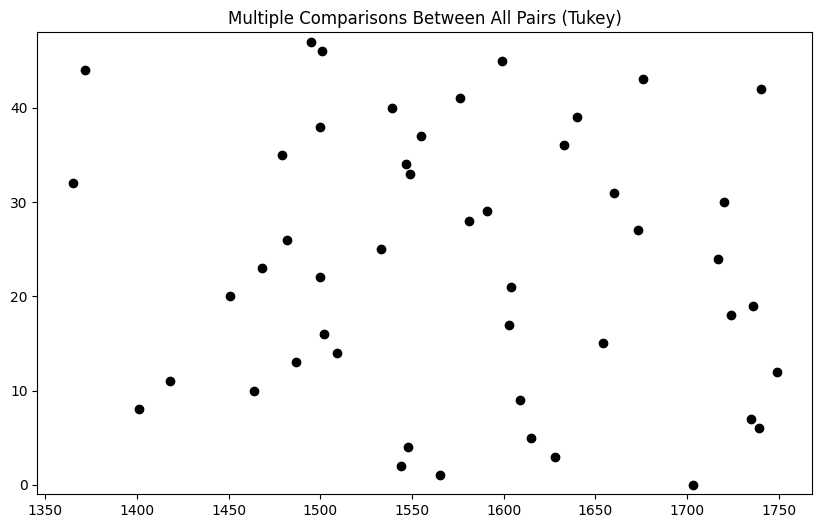

In [84]:
# tukey 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# line 주효과 사후검정
tukey_line = pairwise_tukeyhsd(df['total'], df['line'], alpha=0.05)
print(tukey_line)

# month 주효과 사후검정
tukey_month = pairwise_tukeyhsd(df['total'], df['month'], alpha=0.05)
print(tukey_month)

# 교호작용 
df['group'] = df['line'].astype(str) + '_' + df['month'].astype(str)
tukey_interaction = pairwise_tukeyhsd(df['total'], df['group'], alpha = 0.05)
print(tukey_interaction)
tukey_interaction.plot_simultaneous()
plt.show()
